In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
import sklearn.model_selection as ms

import sys
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

%matplotlib inline

In [2]:
#Read Data Source
train_values = pd.read_csv('train_values_OL27nta.csv')
train_values.head(5)

train_labels = pd.read_csv('train_labels_DPetPH2.csv')
train_labels.head(5)

train = train_values.merge(train_labels,on='row_id')
train.head(5)
train.shape

(1562, 46)

In [3]:
labels = np.array(train['gross_rent'])
print(labels)

[577 844 700 ... 754 640 976]


In [4]:
(train.astype(np.object) == '?').any()

row_id                                        False
county_code                                   False
state                                         False
population                                    False
renter_occupied_households                    False
pct_renter_occupied                           False
evictions                                     False
rent_burden                                   False
pct_white                                     False
pct_af_am                                     False
pct_hispanic                                  False
pct_am_ind                                    False
pct_asian                                     False
pct_nh_pi                                     False
pct_multiple                                  False
pct_other                                     False
poverty_rate                                  False
rucc                                          False
urban_influence                               False
economic_typ

In [5]:
numerical_with_bool = [var for var in train.columns if train[var].dtype!='O']
print('There are {} numerical variables. This includes boolean values'.format(len(numerical_with_bool)))

There are 41 numerical variables. This includes boolean values


In [6]:
boolean = [var for var in train.columns if train[var].dtype=='?']
print('There are {} boolean variables'.format(len(boolean)))

There are 0 boolean variables


In [7]:
numerical = [var for var in train[numerical_with_bool] if var not in boolean]
print('There are {} numerical variables'.format(len(numerical)))

There are 41 numerical variables


In [8]:
vars_num_removed =[var for var in train.columns if train[var].isnull().mean()> 0.6 and train[var].dtypes!='O']
print(vars_num_removed)

['homicides_per_100k']


In [9]:
numerical = [var for var in train[numerical] if var not in vars_num_removed]
print('There are {} numerical variables'.format(len(numerical)))

There are 40 numerical variables


In [10]:
train.isnull().sum()

row_id                                          0
county_code                                     0
state                                           0
population                                      0
renter_occupied_households                      0
pct_renter_occupied                             0
evictions                                     327
rent_burden                                     0
pct_white                                       0
pct_af_am                                       0
pct_hispanic                                    0
pct_am_ind                                      0
pct_asian                                       0
pct_nh_pi                                       0
pct_multiple                                    0
pct_other                                       0
poverty_rate                                    0
rucc                                            0
urban_influence                                 0
economic_typology                               0


In [43]:
train.describe().to_csv("traindescribe.csv")

In [11]:
# replace the missing values
for var in numerical:
    
    # calculate the mode
    mode_val = np.mean(train[var])
    
    # train
    
    train[var].fillna(mode_val, inplace=True)
    
# check that we have no more missing values in the engineered variables
train.isnull().sum()

row_id                                          0
county_code                                     0
state                                           0
population                                      0
renter_occupied_households                      0
pct_renter_occupied                             0
evictions                                       0
rent_burden                                     0
pct_white                                       0
pct_af_am                                       0
pct_hispanic                                    0
pct_am_ind                                      0
pct_asian                                       0
pct_nh_pi                                       0
pct_multiple                                    0
pct_other                                       0
poverty_rate                                    0
rucc                                            0
urban_influence                                 0
economic_typology                               0


In [12]:
[var for var in train.columns if train[var].isnull().sum()>0]

['homicides_per_100k']

In [13]:
#X_train = X_train.replace([np.inf, -np.inf], np.nan).dropna(subset=["evictions"], how="all")
train = train.replace([np.inf, -np.inf], np.nan) 
train['homicides_per_100k'] = train['homicides_per_100k'].fillna(np.mean(train['homicides_per_100k']))
train.head(5)

,row_id,county_code,state,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,...,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,gross_rent
0,0,8e686a7,fb8cab1,3876.0,408.0,24.583,397.410526,18.380,0.945945,0.010761,...,0.471,0.218,0.190,0.083250,0.327984,0.389168,0.199599,10.008982,9.752342,577
1,1,d1b5fc5,842bd12,10224.0,1166.0,28.346,3.000000,26.694,0.808959,0.002284,...,0.472,0.290,0.077,0.099099,0.202202,0.302302,0.396396,14.482893,3.013219,844
2,2,19a463b,2b7da97,27023.0,2927.0,21.641,9.000000,31.028,0.956621,0.005141,...,0.496,0.208,0.192,0.137725,0.387226,0.255489,0.219561,9.620346,10.873572,700
3,3,1711ab7,5029ed4,8735.0,1039.0,23.110,0.000000,27.734,0.894835,0.000298,...,0.503,0.193,0.215,0.077154,0.308617,0.398798,0.215431,9.383225,10.870809,592
4,4,1eb4681,b795815,3681.0,365.0,21.985,2.000000,19.673,0.923886,0.000496,...,0.516,0.222,0.230,0.092537,0.362189,0.346269,0.199005,9.543286,14.723926,444


In [14]:
[var for var in train.columns if train[var].isnull().sum()>0]

[]

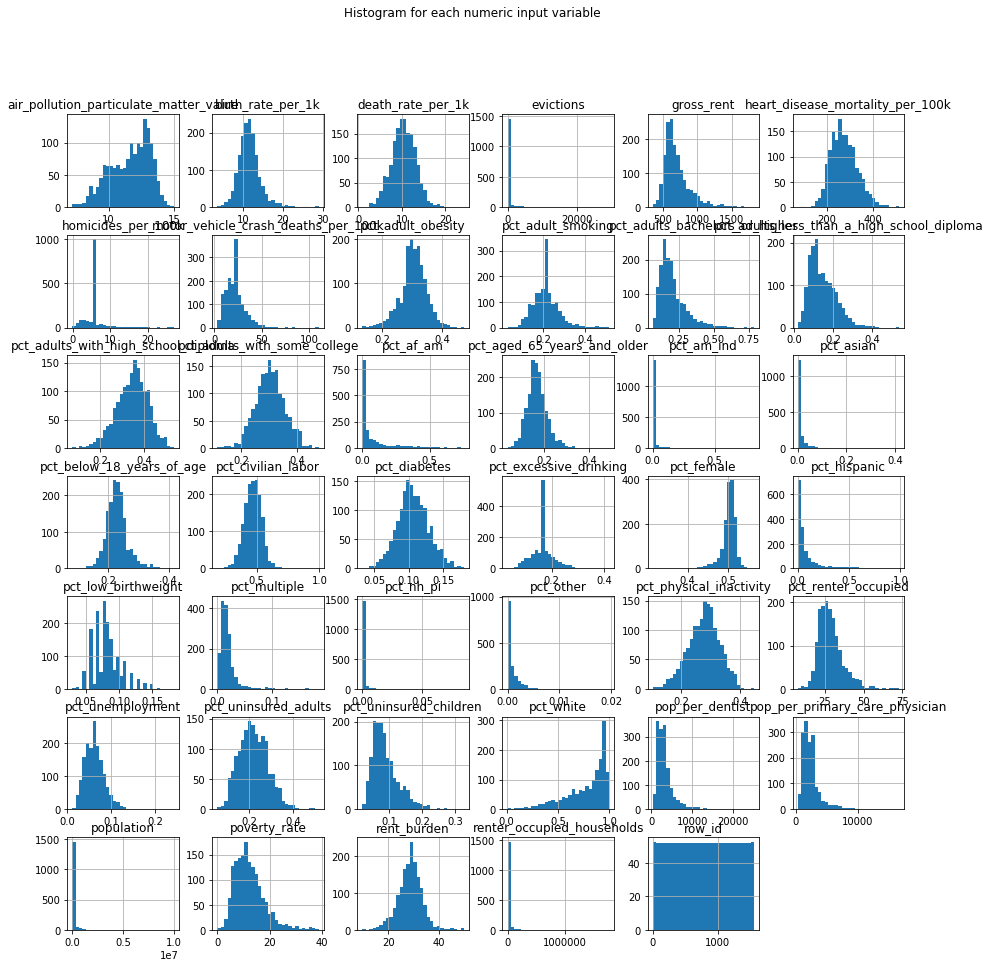

In [46]:
train.hist(bins=30, figsize=(15,15))
plt.suptitle("Histogram for each numeric input variable")
#plt.savefig('trainoverview.jpg')
plt.show()

In [15]:
categorical = [var for var in train.columns if train[var].dtype=='O']
print(categorical)

['county_code', 'state', 'rucc', 'urban_influence', 'economic_typology']


In [16]:
import sys
np.set_printoptions(threshold=sys.maxsize)
print(np.unique(train['county_code'],return_counts = True))
np.set_printoptions(threshold=1000)

(array(['0005c75', '0027601', '00466f3', '0081051', '00b26ab', '00b32a7',
       '00bed13', '01177c9', '0184527', '0191d27', '01a5bb7', '01bb85d',
       '01ea87d', '02082d7', '02d7ae1', '0317131', '031cd79', '03227cb',
       '0322f7b', '03304e1', '03489a3', '03708d9', '0371c63', '03b6937',
       '03bab09', '03c898b', '03cc769', '04173d3', '0433c85', '04567d7',
       '045f485', '048d67d', '04c8d09', '04d21c1', '04eab09', '0502d19',
       '055e1a9', '0581cf5', '059cccb', '05b757b', '05bf4e5', '0602f87',
       '063b6d9', '06874dd', '06a6619', '06a9047', '06d7417', '072036b',
       '0740751', '0805949', '089fee9', '08c146f', '08ced25', '0901dbf',
       '0921795', '0949087', '097cc29', '098cf1b', '09a2291', '09b6d8f',
       '09da751', '09f2ecf', '0a1e7e3', '0a4702d', '0a5080f', '0a95e99',
       '0ab72bf', '0b61b03', '0b8d5b7', '0b9df9d', '0bf4cad', '0c26221',
       '0c38665', '0c4a7c9', '0c89023', '0cade7f', '0cb9ed5', '0cc0b2d',
       '0cd7e4b', '0d03167', '0d5011d', '0d5802b',

In [17]:
print(np.unique(train['state'],return_counts = True))   

(array(['08f8fb4', '09d8cd0', '0f8930b', '105e445', '158df01', '1646cf6',
       '176f5f0', '1b0d913', '1dcfd4e', '20d32fc', '2b7da97', '3337bbb',
       '3745933', '375d4d3', '4522abc', '485e9af', '4c72956', '4cd9667',
       '5029ed4', '5086a32', '528ea9f', '52acab4', '64ffe5d', '698ab34',
       '6d287d7', '7572db1', '78e8330', '7dd3518', '8036085', '842bd12',
       '914c15f', '9d0874a', '9d1e27d', '9dda412', '9e0007d', '9e065a4',
       'a952566', 'b44cfe6', 'b795815', 'bc77872', 'c3dbf0a', 'c479f0c',
       'd233cec', 'dc9ae72', 'dfc21f3', 'e2f94fa', 'e74aca3', 'e899d7f',
       'fa605d5', 'fb8cab1'], dtype=object), array([ 54,  47,  44,   4,  38,  27,  16, 131,  37,  56,   6,   6,  19,
         2,  93,  25,  31,  20,   8,  28,  57,  31,  15,  21,   4,  40,
        33,  18,  35,  26,   1,  39,  47,  39,  33,   1,  69,   6,  45,
         7,  34,  56,  10,  50,   6,  44,  36,  31,   6,  30]))


In [18]:
print(np.unique(train['rucc'],return_counts = True))

(array(['Metro - Counties in metro areas of 1 million population or more',
       'Metro - Counties in metro areas of 250,000 to 1 million population',
       'Metro - Counties in metro areas of fewer than 250,000 population',
       'Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area',
       'Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area',
       'Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area',
       'Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area',
       'Nonmetro - Urban population of 20,000 or more, adjacent to a metro area',
       'Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area'],
      dtype=object), array([219, 193, 165, 120, 215, 301, 206, 101,  42]))


In [19]:
print(np.unique(train['urban_influence'],return_counts = True))

(array(['Large-in a metro area with at least 1 million residents or more',
       'Micropolitan adjacent to a large metro area',
       'Micropolitan adjacent to a small metro area',
       'Micropolitan not adjacent to a metro area',
       'Noncore adjacent to a large metro area',
       'Noncore adjacent to a small metro and does not contain a town of at least 2,500 residents',
       'Noncore adjacent to a small metro with town of at least 2,500 residents',
       'Noncore adjacent to micro area and contains a town of 2,500-19,999 residents',
       'Noncore adjacent to micro area and does not contain a town of at least 2,500 residents',
       'Noncore not adjacent to a metro/micro area and contains a town of 2,500  or more residents',
       'Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents',
       'Small-in a metro area with fewer than 1 million residents'],
      dtype=object), array([219,  64, 113, 131,  79,  88, 178,  86,  97

In [20]:
print(np.unique(train['economic_typology'],return_counts = True))

(array(['Farm-dependent', 'Federal/State government-dependent',
       'Manufacturing-dependent', 'Mining-dependent', 'Nonspecialized',
       'Recreation'], dtype=object), array([217, 191, 244, 113, 631, 166]))


In [21]:
FeaturesLabel= ''

def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['rucc','urban_influence', 'economic_typology']

FeaturesLabel = encode_string(train['state'])
for col in categorical_columns:
    temp = encode_string(train[col])
    FeaturesLabel = np.concatenate([FeaturesLabel, temp], axis = 1)

print(FeaturesLabel.shape)
print(FeaturesLabel)   

(1562, 77)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories

In [22]:
Features = np.concatenate([FeaturesLabel, np.array(train[['pct_below_18_years_of_age','pct_adult_obesity',
                         'pct_am_ind','pct_physical_inactivity','rent_burden','pct_adults_less_than_a_high_school_diploma',
                         'pct_asian','pct_female','evictions','poverty_rate','pct_af_am','pop_per_dentist',
                         'pct_adults_bachelors_or_higher','death_rate_per_1k','pct_nh_pi','pct_adult_smoking',
                         'renter_occupied_households','birth_rate_per_1k','air_pollution_particulate_matter_value',
                         'pct_diabetes','pct_other','pct_aged_65_years_and_older','pct_adults_with_high_school_diploma',
                         'motor_vehicle_crash_deaths_per_100k']])], axis = 1)
    
print(Features.shape)
print(Features[:2, :])   

(1562, 101)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e

In [23]:
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 150)

X_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [24]:
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [25]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 3.16450227e+00  2.45963250e+01 -9.54110466e-01  1.29137287e+02
  2.24562883e+01  8.21605270e+01  3.79998112e+01  3.35982407e+01
  7.26327851e+01  4.28103756e+01  1.07547226e+02  1.66368855e+02
  2.95195959e+01  8.37777772e+01  6.76770082e+01  5.95019968e+01
  1.80817379e+02  3.09237589e+00 -8.88194082e-01  3.36329057e+01
  5.64237428e+01  4.83842876e+00 -8.75240002e+01  8.19976854e+01
  1.68293709e+01  1.57797776e+02 -7.83324630e+01  2.13306962e+02
 -3.40621593e+01 -4.25646235e+01  2.40413054e+02  6.69862756e+01
  7.77277928e+01 -6.58400741e+01  5.00998651e+01  2.49780040e+02
  1.61981513e+02  2.45210737e+02 -2.55390134e+01  1.54654550e+02
  6.96196625e+01 -2.17016024e+01  4.62542879e+01 -3.91915855e+01
  1.47623444e+02 -5.57961770e+01 -3.07545714e+01  5.11829939e+01
  3.50330873e+01 -5.06846886e+01  3.26464592e+02  1.94366168e+02
  1.90207204e+02  3.35731221e+02  3.21296378e+02  3.59969132e+02
  3.38638827e+02  3.65294173e+02  3.42451572e+02  3.26464592e+02
  2.54917863e+02  1.9

In [26]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
   #R^2=1−∑i(yi−y^i)2/∑i(yi−y¯)2
    r2 = sklm.r2_score(y_true, y_predicted)
   # r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
   
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(X_test) 
print_metrics(y_test, y_score, 28)    

Mean Square Error      = 6670.521036344456
Root Mean Square Error = 81.67325777967018
Mean Absolute Error    = 58.559805134013466
Median Absolute Error  = 47.07788463730253
R^2                    = 0.8037197860934054
Adjusted R^2           = 0.7602807223599788


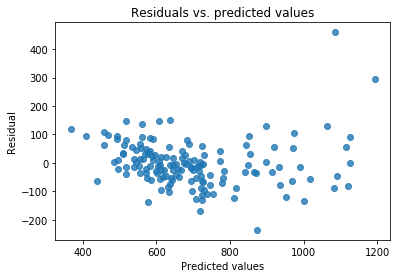

In [27]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score) 

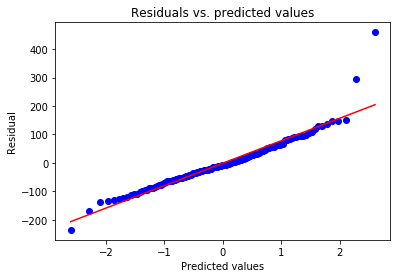

In [28]:
import scipy.stats as ss

def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)   

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in subtract
  app.launch_new_instance()
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


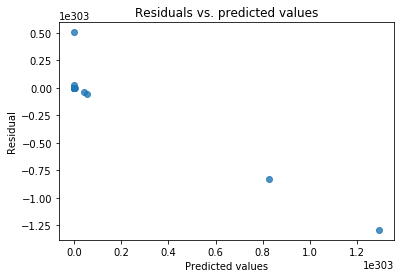

In [29]:
y_score_untransform = np.exp(y_score)
y_test_untransform = np.exp(y_test)
resid_plot(y_test_untransform, y_score_untransform) 

In [30]:
#using refined as raw feature file contains a unwanted state just for confusion with feature calculations. 
#to solve it, I replaced that state with a similar one.
test_values = pd.read_csv('test_values_refined.csv')
test_values.head(5)

,row_id,gross_rent
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


In [31]:
test_values.isnull().sum()

row_id                                          0
county_code                                     0
state                                           0
population                                      0
renter_occupied_households                      0
pct_renter_occupied                             0
evictions                                     313
rent_burden                                     0
pct_white                                       0
pct_af_am                                       0
pct_hispanic                                    0
pct_am_ind                                      0
pct_asian                                       0
pct_nh_pi                                       0
pct_multiple                                    0
pct_other                                       0
poverty_rate                                    0
rucc                                            0
urban_influence                                 0
economic_typology                               0


In [32]:
print(np.unique(test_values['state'],return_counts = True))      
print(np.unique(test_values['rucc'],return_counts = True))
print(np.unique(test_values['urban_influence'],return_counts = True))
print(np.unique(test_values['economic_typology'],return_counts = True))

(array(['08f8fb4', '09d8cd0', '0f8930b', '105e445', '158df01', '1646cf6',
       '176f5f0', '1b0d913', '1dcfd4e', '20d32fc', '2b7da97', '3337bbb',
       '3745933', '375d4d3', '4522abc', '485e9af', '4c72956', '4cd9667',
       '5029ed4', '5086a32', '528ea9f', '52acab4', '64ffe5d', '698ab34',
       '6d287d7', '7572db1', '78e8330', '7dd3518', '8036085', '842bd12',
       '914c15f', '9d0874a', '9d1e27d', '9dda412', '9e0007d', '9e065a4',
       'a952566', 'b44cfe6', 'b795815', 'bc77872', 'c3dbf0a', 'c479f0c',
       'd233cec', 'dc9ae72', 'dfc21f3', 'e2f94fa', 'e74aca3', 'e899d7f',
       'fa605d5', 'fb8cab1'], dtype=object), array([ 61,  45,  39,   1,  50,  40,  20, 123,  27,  44,   8,   2,  20,
         8,  66,  40,  27,  13,  15,  34,  63,  46,  14,  25,  11,  27,
        32,  10,  21,  18,   3,  43,  48,  48,  42,   2,  64,  18,  48,
        14,  21,  46,   6,  55,   8,  55,  36,  36,  10,  23]))
(array(['Metro - Counties in metro areas of 1 million population or more',
       'Metro -

In [33]:
numerical_with_bool = [var for var in test_values.columns if test_values[var].dtype!='O']
print('There are {} numerical variables. This includes boolean values'.format(len(numerical_with_bool)))

boolean = [var for var in test_values.columns if test_values[var].dtype=='?']
print('There are {} boolean variables'.format(len(boolean)))

numerical = [var for var in test_values[numerical_with_bool] if var not in boolean]
print('There are {} numerical variables'.format(len(numerical)))

vars_num_removed =[var for var in test_values.columns if test_values[var].isnull().mean()> 0.6 and test_values[var].dtypes!='O']
print(vars_num_removed)

numerical = [var for var in test_values[numerical] if var not in vars_num_removed]
print('There are {} numerical variables'.format(len(numerical)))

# replace the missing values
for var in numerical:
    
    # calculate the mode
    mode_val = np.mean(test_values[var])
    
    # test 
    test_values[var].fillna(mode_val, inplace=True)
    
# check that we have no more missing values in the engineered variables
test_values.isnull().sum()

There are 40 numerical variables. This includes boolean values
There are 0 boolean variables
There are 40 numerical variables
[]
There are 40 numerical variables


row_id                                        0
county_code                                   0
state                                         0
population                                    0
renter_occupied_households                    0
pct_renter_occupied                           0
evictions                                     0
rent_burden                                   0
pct_white                                     0
pct_af_am                                     0
pct_hispanic                                  0
pct_am_ind                                    0
pct_asian                                     0
pct_nh_pi                                     0
pct_multiple                                  0
pct_other                                     0
poverty_rate                                  0
rucc                                          0
urban_influence                               0
economic_typology                             0
pct_civilian_labor                      

In [34]:
[var for var in test_values.columns if test_values[var].isnull().sum()>0]

[]

In [35]:
#X_train = X_train.replace([np.inf, -np.inf], np.nan).dropna(subset=["evictions"], how="all")
test_values = test_values.replace([np.inf, -np.inf], np.nan) 
test_values['homicides_per_100k'] = test_values['homicides_per_100k'].fillna(np.mean(test_values['homicides_per_100k']))
test_values.shape
test_values.head(5)

,row_id,county_code,state,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,...,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
0,0,8e7613e,9d1e27d,52842.0,5403.0,26.840,330.127474,27.960,0.924234,0.025049,...,2710.0,0.512,0.215,0.177,0.174651,0.395210,0.274451,0.155689,9.828291,10.628268
1,1,694a5e8,a952566,212287.0,53502.0,57.534,6032.000000,33.072,0.398318,0.484635,...,1009.0,0.522,0.192,0.113,0.168327,0.230080,0.241036,0.360558,13.285546,8.818293
2,2,b3f0726,20d32fc,81263.0,13368.0,39.994,1012.000000,32.044,0.483789,0.381916,...,2459.0,0.526,0.240,0.153,0.201816,0.329970,0.287588,0.180626,11.571830,10.136089
3,3,fd922f0,1b0d913,122870.0,19359.0,41.865,330.127474,30.724,0.468043,0.088393,...,1240.0,0.491,0.282,0.111,0.239563,0.277336,0.333996,0.149105,17.191860,10.089273
4,4,3bd551e,698ab34,146153.0,15766.0,30.681,644.000000,30.860,0.651511,0.251317,...,2509.0,0.516,0.259,0.108,0.100100,0.289289,0.360360,0.250250,12.463880,6.432751


In [36]:
FeaturesTestLabel= ''

def encode_string(cat_test_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_test_features)
    enc_cat_features = enc.transform(cat_test_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categoricalTest_columns = ['rucc','urban_influence', 'economic_typology']

FeaturesTestLabel = encode_string(test_values['state'])
for col in categoricalTest_columns:
    temp = encode_string(test_values[col])
    FeaturesTestLabel = np.concatenate([FeaturesTestLabel, temp], axis = 1)

print(FeaturesTestLabel.shape)
print(FeaturesTestLabel)   

(1576, 77)
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories

In [37]:
FeaturesTestFinal = np.concatenate([FeaturesTestLabel, np.array(test_values[['pct_below_18_years_of_age','pct_adult_obesity',
                         'pct_am_ind','pct_physical_inactivity','rent_burden','pct_adults_less_than_a_high_school_diploma',
                         'pct_asian','pct_female','evictions','poverty_rate','pct_af_am','pop_per_dentist',
                         'pct_adults_bachelors_or_higher','death_rate_per_1k','pct_nh_pi','pct_adult_smoking',
                         'renter_occupied_households','birth_rate_per_1k','air_pollution_particulate_matter_value',
                         'pct_diabetes','pct_other','pct_aged_65_years_and_older','pct_adults_with_high_school_diploma',
                         'motor_vehicle_crash_deaths_per_100k']])], axis = 1)

print(FeaturesTestFinal.shape)
print(FeaturesTestFinal[:2, :])   

(1576, 101)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e

In [38]:
outputPrediction=lin_mod.predict(FeaturesTestFinal)

In [39]:
outputData = { "row_id":test_values['row_id'].astype(int) , "gross_rent": outputPrediction.astype(int)}
outputData = pd.DataFrame(data=outputData)
outputData.to_csv("predictingcounty_final.csv.csv",sep=',',columns=["row_id","gross_rent"], encoding='utf-8', index=False)

print(outputData[['row_id','gross_rent']].head(5))

   row_id  gross_rent
0       0         649
1       1         910
2       2         690
3       3         743
4       4         876
